In [4]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from textblob import TextBlob
from config import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import seaborn as sns
from datetime import datetime
from pprint import pprint

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
accounts = []
req_acc = ''
new_acc = '@PayPal'
if new_acc not in accounts:
    accounts.append(new_acc)

In [23]:
# Function for plotting
def senti_plot(data):
    df = pd.DataFrame(data)
    current_date = datetime.now().date().strftime("%d.%m.%Y")
    sns.set()
    
    #plt.figure()
    ax = df.plot(kind='line', x='Tweets Ago', y='Polarity', marker='o', linewidth=0.3, color='g', alpha=0.9)
    ax.set_ylim(-1.1, 1.1)
    ax.set_ylabel('Tweet Polarity')
    ax.set_title(f'Sentiment Analysis of Tweets ({current_date})\n Requested by {req_acc}')
    return plt

In [24]:
def blob_sent(acc):
    
    total_mood = []
    last_tweet = None
    tweet_counter = 0
    
    for x in range(2):
        
        all_data = api.user_timeline(acc, count=10, max_id=last_tweet, page=x)
        
        for tweet in all_data:
            
            blob = TextBlob(tweet['text'])
            sentiment = blob.sentiment
            total_mood.append({'source': acc,
                             'Polarity': sentiment[0],
                             'Subjectivity': sentiment[1],
                             'Tweets Ago': tweet_counter,
                             'text': tweet['text'],
                             'time': tweet['created_at'],
                              'likes': tweet['favorite_count'],
                              'RT': tweet['retweet_count']})
            tweet_counter -= 1
        last_tweet = tweet["id"] - 1
    return senti_plot(total_mood)

<module 'matplotlib.pyplot' from '/Users/sonik/anaconda3/envs/pythondata/lib/python3.6/site-packages/matplotlib/pyplot.py'>

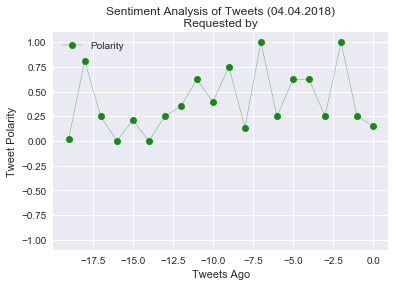

In [22]:
blob_sent(new_acc)

In [ ]:
# Vader sentiment analysis
def senti_get(acc):
    
    total_mood = []
    last_tweet = None
    tweet_counter = 0
    
    for x in range(10):

        all_data = api.user_timeline(acc, count=50, max_id=last_tweet, page=x)
        
        for tweet in all_data:
            
            emotions = analyzer.polarity_scores(tweet['text'])
            
            total_mood.append({'source': acc,
                             'Polarity': emotions['compound'],
                             'positive': emotions['pos'],
                             'negative': emotions['neg'],
                             'neutral': emotions['neu'],
                             'Tweets Ago': tweet_counter,
                             'text': tweet['text'],
                             'time': tweet['created_at'],
                              'likes': tweet['favorite_count'],
                              'RT': tweet['retweet_count']})
            
            tweet_counter -= 1

        last_tweet = tweet["id"] - 1
    return(total_mood)